In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
%load_ext autoreload
%autoreload 2
from FunctionalSmoothingSpline import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Example 2 and 3

In [29]:
filename = "./Sales1.csv"
MyData = pd.read_csv(filename, sep = ";", decimal=',')
MyData.head()

,t,Values
0,01.12.2009,21.95
1,17.12.2009,5.70
2,18.01.2010,18.75
3,05.03.2010,15.25
4,23.03.2010,8.50


In [30]:
t = pd.to_datetime(MyData.t.dropna(), format='%d.%m.%Y')
t_start = min(t)
t = np.array([(x-t_start).days for x in t])
Y = MyData.Values.dropna().to_numpy()
n = len(t)
Y = Y[0:(n-1)]
m = round(3*n)
t

array([  0,  16,  48,  94, 112, 188, 316, 376, 416, 485, 502, 513, 583])

In [31]:
n

13

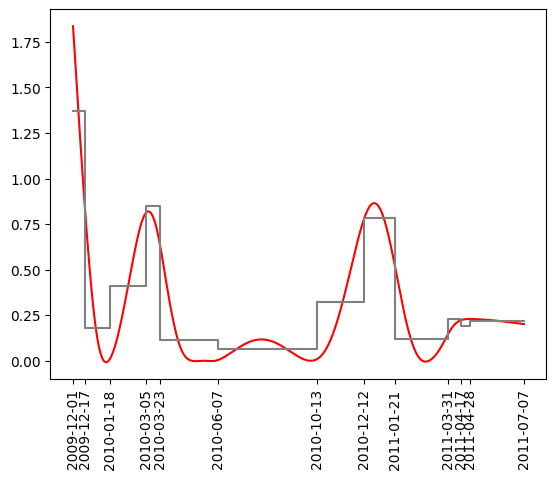

In [41]:
# r =
y = FunctionalSmoothingSpline(	t_int_a = t[0:(n-1)],
                				t_int_b = t[1:n], 
                				values_int = Y,
                				knots_number = m,
                				alpha = 10**5,
                                All_Positive = True, integral = False, info = False)

#x = r['x']
#y = r['y']
x = np.append(np.arange(t[0],t[-1],1), t[-1])

plt.plot(x, y, color = "red")
x2 = np.array([])
y2 = np.array([])
for i in range(n-1):
    x2 = np.append(x2,[ t[i], t[i+1] ])
    y2 = np.append(y2, [ Y[i]/(t[i+1]-t[i]), Y[i]/(t[i+1]-t[i]) ] )
plt.plot(x2,y2,color="grey")
plt.xticks(ticks=t, labels=[(t_start+pd.Timedelta(tx,"d")).date() for tx in t], rotation='vertical')
plt.show()
#print(r)

In [9]:
y

array([ 1.83603272e+00,  1.76814069e+00,  1.70032519e+00,  1.63266275e+00,
        1.56522989e+00,  1.49810313e+00,  1.43135901e+00,  1.36507406e+00,
        1.29932479e+00,  1.23418775e+00,  1.16973945e+00,  1.10605642e+00,
        1.04321519e+00,  9.81292294e-01,  9.20364249e-01,  8.60507586e-01,
        8.01800574e-01,  7.44342384e-01,  6.88245993e-01,  6.33624622e-01,
        5.80591494e-01,  5.29259829e-01,  4.79742850e-01,  4.32153777e-01,
        3.86605833e-01,  3.43212239e-01,  3.02086216e-01,  2.63340986e-01,
        2.27089771e-01,  1.93445792e-01,  1.62522271e-01,  1.34431287e-01,
        1.09206904e-01,  8.67564381e-02,  6.69755974e-02,  4.97600878e-02,
        3.50056159e-02,  2.26078881e-02,  1.24626109e-02,  4.46549062e-03,
       -1.48776621e-03, -5.50145313e-03, -7.67986372e-03, -8.12729152e-03,
       -6.94803009e-03, -4.24637296e-03, -1.26613703e-04,  5.31571443e-03,
        1.20229991e-02,  1.99478864e-02,  2.90430224e-02,  3.92610534e-02,
        5.05546256e-02,  

# Example 1

In [2]:
filename = "./DiscrSignals.csv"
MyData = pd.read_csv(filename, sep = ";", decimal=',')
MyData

,t_f,y_f,t_df,y_df,t_d2f,y_d2f,t_int_a,t_int_b,y_int
0,20.02.2021,100.0,31.03.2021,0.000000,19.05.2021,0.0,25.03.2021,24.04.2021,3999.916
1,08.12.2021,20.0,07.05.2021,-1.749674,NaN,NaN,21.10.2021,20.11.2021,2281.669
2,01.01.2022,0.0,06.07.2021,0.000000,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,11.08.2021,1.552171,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,29.09.2021,0.000000,NaN,NaN,NaN,NaN,NaN


In [7]:
pd.to_datetime(MyData.t_f.dropna(), format='%d.%m.%Y')

0   2021-02-20
1   2021-12-08
2   2022-01-01
Name: t_f, dtype: datetime64[ns]

In [5]:
t_f = pd.to_datetime(MyData.t_f.dropna(), format='%d.%m.%Y')
t_df = pd.to_datetime(MyData.t_df.dropna(), format='%d.%m.%Y')
t_d2f = pd.to_datetime(MyData.t_d2f.dropna(), format='%d.%m.%Y')
t_int_a = pd.to_datetime(MyData.t_int_a.dropna(), format='%d.%m.%Y')
t_int_b = pd.to_datetime(MyData.t_int_b.dropna(), format='%d.%m.%Y')

t_start = min(t_f[0],t_df[0],t_d2f[0],t_int_a[0])
t_f = np.array([(x-t_start).days for x in t_f])
t_df = np.array([(x-t_start).days for x in t_df])
t_d2f = np.array([(x-t_start).days for x in t_d2f])
t_int_a = np.array([(x-t_start).days for x in t_int_a])
t_int_b = np.array([(x-t_start).days for x in t_int_b])

y_f = MyData.y_f.dropna().to_numpy()
y_df = MyData.y_df.dropna().to_numpy()
y_d2f = MyData.y_d2f.dropna().to_numpy()
y_int = MyData.y_int.dropna().to_numpy()

# nf = len(t_f)
# ndf = len(t_df)
# nd2f = len(t_d2f)
# nint = len(t_int_a)
m = round(3*(len(t_f) + len(t_df) + len(t_d2f) + len(t_int_a)))
m

33

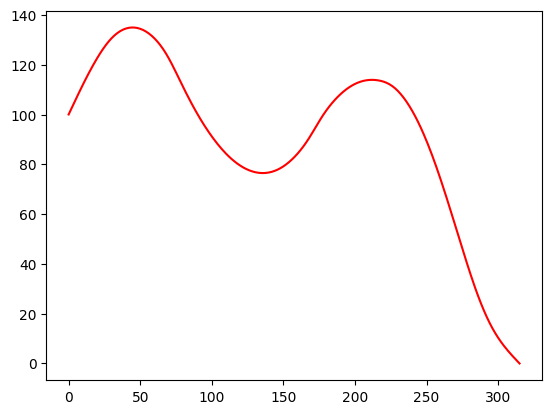

In [12]:
r = FunctionalSmoothingSpline(	t_f = t_f,
                				values_f = y_f,
                				t_df = t_df,
                				values_df = y_df,
                				t_d2f = t_d2f,
                				values_d2f = y_d2f,
                				t_int_a = t_int_a,
                				t_int_b = t_int_b, 
                				values_int = y_int,
                				knots_number = m,
                				alpha = 10**1,
                                All_Positive = False,
                				info = True)
#print(r)
x = r['x']
y = r['y']
plt.plot(x, y, color = "red")


In [13]:
r

{'x': array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
        143., 144., 145., 146., 1